# Chapter 7

## Raster Data

In [ ]:
# Downloading the data, if not yet downloaded

import wget
import os

if not os.path.exists("data.zip"):
    url = 'http://data.geo.admin.ch/ch.swisstopo.images-landsat25/data.zip'
    wget.download(url,bar=None)
else:
    print("ok. data already downloaded.")

In [ ]:
# unzip the data if not yet unzipped

import zipfile

if not os.path.exists("landsat"):
    zip_ref = zipfile.ZipFile("data.zip", 'r')
    zip_ref.extractall("landsat")
    zip_ref.close()
else:
    print("ok. data already unzipped.")

In [ ]:
# Now we have the tif file "landsat/LandsatMos25.tif" extracted

import rasterio

ds = rasterio.open('landsat/LandsatMos25.tif', 'r')

In [ ]:
print(ds.name)
print(ds.count) # number of raster bands, in our case 3 for r,g,b
print(ds.width, ds.height)

In [ ]:
ds.dtypes

In [ ]:
print(ds.crs)

In [ ]:
print(ds.bounds)

In [ ]:
print(ds.transform)  # affine transformation pixel to crs+

In [ ]:
from rasterio.crs import CRS

ds = rasterio.open('landsat/LandsatMos25.tif', 'r+')
crs = CRS.from_epsg(21781)
ds.crs = crs
print(ds.crs)

In [ ]:
ds.transform * (0, 0)    # Pixel to CRS

In [ ]:
~ds.transform # inverse affine transformation
~ds.transform * (0,0) # CRS to Pixel
px, py = ~ds.transform * (612073, 267991)
print(px,py)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
r = ds.read(1)
g = ds.read(2)
b = ds.read(3)

In [ ]:
rgb = np.dstack((r,g,b))  # stack r,g,b so we can display it...

In [ ]:
fig, ax = plt.subplots(figsize=(15,9))
ax.imshow(rgb, interpolation='bilinear')
ax.plot(px,py, 'ro'); 

## Vector Data

We're downloading earthquake data from USGS:
https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

This data is updated every minute

* 2.5_week.geojson: All earthquakes > 2.5 from the last week
* 2.5_month.geojson: All earthquakes with a magnitude > 2.5 from the last month

We're looking at the data from last week

In [1]:
import requests

url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
#url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_month.geojson"

data = requests.get(url)
file = open("earthquakes.geojson","wb")
file.write(data.content)
file.close()

Now let's import geopandas

In [2]:
import geopandas as gpd

eq_gdf = gpd.read_file("earthquakes.geojson")
eq_gdf.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,sources,types,nst,dmin,rms,gap,magType,type,title,geometry
0,ak01974f078a,3.00,"10km NNW of Anchorage, Alaska",1559624088074,1559629426013,-540,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,1.0,2.0,...,",ak,",",dyfi,geoserve,origin,shakemap,",NaN,NaN,1.51,NaN,ml,earthquake,"M 3.0 - 10km NNW of Anchorage, Alaska",POINT Z (-149.9612 61.3074 40.8)
1,hv70981096,2.96,"3km N of Kailua-Kona, Hawaii",1559623704160,1559629478703,-600,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,2.0,2.2,...,",hv,",",dyfi,geoserve,origin,phase-data,",57.0,0.15130,0.36,256.0,ml,earthquake,"M 3.0 - 3km N of Kailua-Kona, Hawaii",POINT Z (-155.9954987 19.6700001 108.7)
2,us70003v3j,6.30,"Izu Islands, Japan region",1559623157501,1559629615368,540,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,2.0,3.1,...,",us,",",dyfi,geoserve,losspager,origin,phase-data,sha...",NaN,3.21900,0.80,21.0,mww,earthquake,"M 6.3 - Izu Islands, Japan region",POINT Z (139.2932 29.0623 430.3)
3,ci38621152,3.33,"5km NW of Cabazon, CA",1559622842590,1559629697341,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,310.0,3.4,...,",ci,",",dyfi,focal-mechanism,geoserve,nearby-cities,o...",92.0,0.05312,0.18,33.0,ml,earthquake,"M 3.3 - 5km NW of Cabazon, CA",POINT Z (-116.824501 33.9550018 15.52)
4,us70003v2z,4.50,"78km NNE of Calama, Chile",1559618161671,1559619675040,-240,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,",us,",",geoserve,origin,phase-data,",NaN,0.44500,0.91,44.0,mb,earthquake,"M 4.5 - 78km NNE of Calama, Chile",POINT Z (-68.7628 -21.7797 117.56)


Now we use GeoPandas to load the dataset

Let's simplify the output and only take most important rows

In [3]:
eq = eq_gdf[["time","mag", "place","geometry"]].copy()
eq.head()

,time,mag,place,geometry
0,1559624088074,3.00,"10km NNW of Anchorage, Alaska",POINT Z (-149.9612 61.3074 40.8)
1,1559623704160,2.96,"3km N of Kailua-Kona, Hawaii",POINT Z (-155.9954987 19.6700001 108.7)
2,1559623157501,6.30,"Izu Islands, Japan region",POINT Z (139.2932 29.0623 430.3)
3,1559622842590,3.33,"5km NW of Cabazon, CA",POINT Z (-116.824501 33.9550018 15.52)
4,1559618161671,4.50,"78km NNE of Calama, Chile",POINT Z (-68.7628 -21.7797 117.56)


Look at the histogramm:

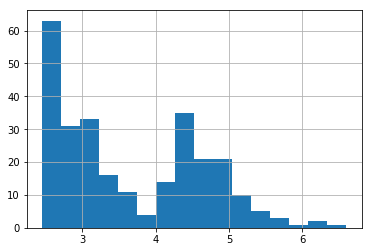

In [5]:
%matplotlib inline
eq.mag.hist(bins=16);

Timestamps in UTC are not really human readable...
Let's convert them

In [ ]:
from datetime import datetime, timezone

data = []
for row in range(0,len(eq)):
    time = eq.iloc[row].time
    t = str(datetime.fromtimestamp(time/1000.0, timezone.utc))
    data.append(t)
    
eq["time_utc"] = data
eq.head()

In [ ]:
eq = eq.drop(['time'], axis=1)

In [ ]:
eq.plot();

Open Natural Earth Dataset with all Polygons of all countries

In [6]:
gdfAdmin0 = gpd.read_file("data/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp", encoding="utf-8")
gdfAdmin0.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,5,2,Indonesia,IDN,0,2,Sovereign country,Indonesia,IDN,...,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,(POLYGON ((117.7036079039552 4.163414542001791...
1,Admin-0 country,5,3,Malaysia,MYS,0,2,Sovereign country,Malaysia,MYS,...,말레이시아,Maleisië,Malezja,Malásia,Малайзия,Malaysia,Malezya,Malaysia,马来西亚,(POLYGON ((117.7036079039552 4.163414542001791...
2,Admin-0 country,6,2,Chile,CHL,0,2,Sovereign country,Chile,CHL,...,칠레,Chili,Chile,Chile,Чили,Chile,Şili,Chile,智利,(POLYGON ((-69.51008875199994 -17.506588197999...
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,Bolivia,BOL,...,볼리비아,Bolivia,Boliwia,Bolívia,Боливия,Bolivia,Bolivya,Bolivia,玻利維亞,POLYGON ((-69.51008875199994 -17.5065881979999...
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,Peru,PER,...,페루,Peru,Peru,Peru,Перу,Peru,Peru,Peru,秘鲁,(POLYGON ((-69.51008875199994 -17.506588197999...


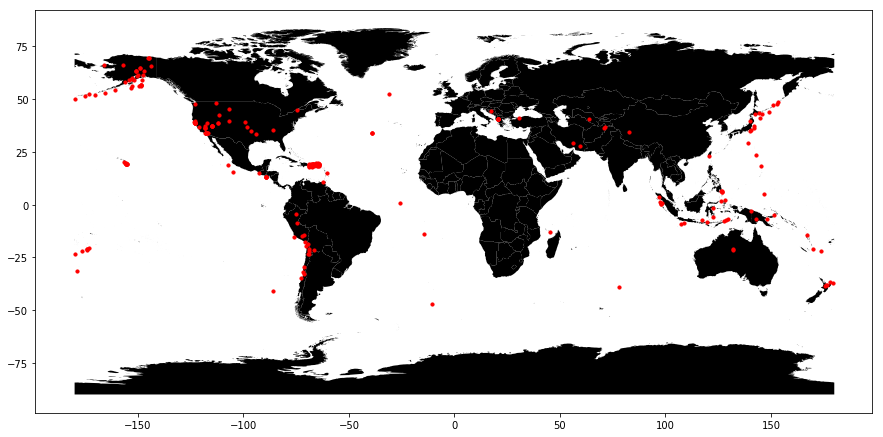

In [10]:
countries = gdfAdmin0.plot(figsize=(15,9), color="black")


In [ ]:
eq.sort_values(["mag"], ascending=False).head()

Point Clouds

In [17]:
from laspy.file import File
import numpy as np

file = File('data/points/26825_12475.las', mode='r')
coords = np.dstack((file.x, file.y, file.z))
file.close()
print(coords)

['Blue', 'Classification', 'Green', 'Intensity', 'Key_Point', 'Raw_Classification', 'Red', 'Synthetic', 'Withheld', 'X', 'Y', 'Z', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_evlrs', '_header', '_mode', '_reader', '_vlrs', 'addProperty', 'assertWriteMode', 'blue', 'byte_offset_to_waveform_data', 'classification', 'classification_flags', 'close', 'define_new_dimension', 'doc', 'edge_flight_line', 'extra_bytes', 'filename', 'flag_byte', 'get_blue', 'get_byte_offset_to_waveform_data', 'get_classification', 'get_classification_flags', 'get_edge_flight_line', 'get_extra_bytes', 'get_flag_byte', 'get_gps_time', 'get_green', 'get_head